In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

In [3]:
def accuracy(y_pred,y_act):  ## y_pred is the y cap in the formula
    return (100.0*np.sum(y_pred==y_act)/y_act.shape[0])

In [4]:
def softmax(a):  ## a vector a
    
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis = 1,keepdims=True)  ## adding the sum along the col
    
    return ans

In [41]:
def loss(y_hot,p):     
    
    l = np.multiply(y_hot,np.log(p))
    l = np.sum(l,axis=1)
    l = np.mean(l)

    return 0-l

In [26]:
def one_hot(y,depth):  ## depth is no. of classes
    
    m = y.shape[0]
    y_out = np.zeros((m,depth))
    y_out[np.arange(m),y] = 1  ## the one that matches with y is 1
    
    return y_out

## Making A Simple NN from random data

In [27]:
X,y = make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

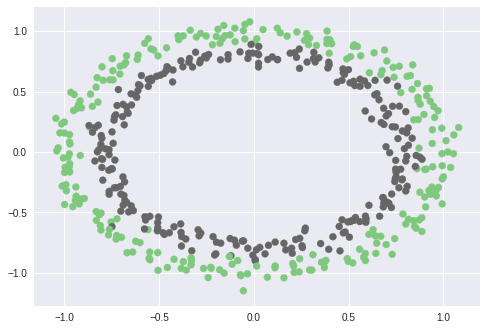

In [28]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [29]:
input_size = 2
layers = [4,3]
output = 2

In [30]:
class NeuralNetwork:
    
    def __init__(self,Inp,layers,Out):
        
        np.random.seed(0)
    
        model = {}
        model["w1"] = np.random.randn(Inp,layers[0])/np.sqrt(Inp)
        model["b1"] = np.zeros((1,layers[0]))
        model["w2"] = np.random.randn(layers[0],layers[1])/np.sqrt(layers[0])
        model["b2"] = np.zeros((1,layers[1]))
        model["w3"] = np.random.randn(layers[1],Out)/np.sqrt(layers[1])
        model["b3"] = np.zeros((1,Out))
    
        self.model = model
        
    def forward_prop(self,X):
        
        z1 = X.dot(self.model["w1"]) + self.model["b1"]
        a1 = np.tanh(z1)
        z2 = a1.dot(self.model["w2"]) + self.model["b2"]
        a2 = np.tanh(z2)
        z3 = a2.dot(self.model["w3"]) + self.model["b3"]
        y_out = softmax(z3)          ## a3 is the y cap
        
        self.act_vals = (a1,a2,y_out)
        return y_out
        
    def backward_prop(self,X,y,LR):
        
        a1,a2,y_out = self.act_vals
        
        delta3 = y_out - y
        m = X.shape[0]  #3 no. of ex
    
        ## all are backtracking formulas
    
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
    
        delta2 = (1 - np.square(a2))*np.dot(delta3,self.model["w3"].T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
    
        delta1 = (1-np.square(a1))*np.dot(delta2,self.model["w2"].T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
    
        self.model["w3"] -= LR*dw3
        self.model["b3"] -= LR*db3
        self.model["w2"] -= LR*dw2
        self.model["b2"] -= LR*db2
        self.model["w1"] -= LR*dw1
        self.model["b1"] -= LR*db1
    
        return model
    
    def predict(self,X):
        
        y_out = self.forward_prop(X)
        return np.argmax(y_out,axis=1)
    
    def summary(self):   ## to give a sumary if sizes of the hidden layers
    
        a1,a2,y_out = self.act_vals
        
        print("w1",self.model["w1"].shape)
        print("a1",a1.shape)

        print("w2",self.model["w2"].shape)
        print("a2",a2.shape)

        print("w3",self.model["w1"].shape)
        print("y_out",y_out.shape)

In [31]:
model = NeuralNetwork(Inp=2,layers=[2,4],Out=2)

In [32]:
y_pred = model.predict(X)

In [33]:
model.summary()

w1 (2, 2)
a1 (500, 2)
w2 (2, 4)
a2 (500, 4)
w3 (2, 2)
y_out (500, 2)


In [42]:
def train(X,y,model,epochs,LR,logs=True):
    
    training_loss = []
    classes = 2
    
    y_hot = one_hot(y,classes)
    
    for ix in range(epochs):
        
        y_out = model.forward_prop(X)
        print(y_hot.shape)
        print(y_out.shape)
        l = loss(y_hot,y_out)
        model.backward_prop(X,y_hot,LR)
        
        if logs:
            print("Epoch %d loss %.4f"%(ix,l))
            
        training_loss.append(l)
        
    return training_loss

In [43]:
_Loss = train(X,y,model,1000,0.001)

(500, 2)
(500, 2)
Epoch 0 loss 0.6932
(500, 2)
(500, 2)
Epoch 1 loss 0.6932
(500, 2)
(500, 2)
Epoch 2 loss 0.6932
(500, 2)
(500, 2)
Epoch 3 loss 0.6932
(500, 2)
(500, 2)
Epoch 4 loss 0.6932
(500, 2)
(500, 2)
Epoch 5 loss 0.6932
(500, 2)
(500, 2)
Epoch 6 loss 0.6932
(500, 2)
(500, 2)
Epoch 7 loss 0.6932
(500, 2)
(500, 2)
Epoch 8 loss 0.6932
(500, 2)
(500, 2)
Epoch 9 loss 0.6932
(500, 2)
(500, 2)
Epoch 10 loss 0.6932
(500, 2)
(500, 2)
Epoch 11 loss 0.6932
(500, 2)
(500, 2)
Epoch 12 loss 0.6932
(500, 2)
(500, 2)
Epoch 13 loss 0.6932
(500, 2)
(500, 2)
Epoch 14 loss 0.6932
(500, 2)
(500, 2)
Epoch 15 loss 0.6932
(500, 2)
(500, 2)
Epoch 16 loss 0.6932
(500, 2)
(500, 2)
Epoch 17 loss 0.6932
(500, 2)
(500, 2)
Epoch 18 loss 0.6932
(500, 2)
(500, 2)
Epoch 19 loss 0.6932
(500, 2)
(500, 2)
Epoch 20 loss 0.6932
(500, 2)
(500, 2)
Epoch 21 loss 0.6932
(500, 2)
(500, 2)
Epoch 22 loss 0.6932
(500, 2)
(500, 2)
Epoch 23 loss 0.6932
(500, 2)
(500, 2)
Epoch 24 loss 0.6932
(500, 2)
(500, 2)
Epoch 25 loss 0.6

(500, 2)
(500, 2)
Epoch 330 loss 0.6931
(500, 2)
(500, 2)
Epoch 331 loss 0.6931
(500, 2)
(500, 2)
Epoch 332 loss 0.6931
(500, 2)
(500, 2)
Epoch 333 loss 0.6931
(500, 2)
(500, 2)
Epoch 334 loss 0.6931
(500, 2)
(500, 2)
Epoch 335 loss 0.6931
(500, 2)
(500, 2)
Epoch 336 loss 0.6931
(500, 2)
(500, 2)
Epoch 337 loss 0.6931
(500, 2)
(500, 2)
Epoch 338 loss 0.6931
(500, 2)
(500, 2)
Epoch 339 loss 0.6931
(500, 2)
(500, 2)
Epoch 340 loss 0.6931
(500, 2)
(500, 2)
Epoch 341 loss 0.6931
(500, 2)
(500, 2)
Epoch 342 loss 0.6931
(500, 2)
(500, 2)
Epoch 343 loss 0.6931
(500, 2)
(500, 2)
Epoch 344 loss 0.6931
(500, 2)
(500, 2)
Epoch 345 loss 0.6931
(500, 2)
(500, 2)
Epoch 346 loss 0.6931
(500, 2)
(500, 2)
Epoch 347 loss 0.6931
(500, 2)
(500, 2)
Epoch 348 loss 0.6931
(500, 2)
(500, 2)
Epoch 349 loss 0.6931
(500, 2)
(500, 2)
Epoch 350 loss 0.6931
(500, 2)
(500, 2)
Epoch 351 loss 0.6931
(500, 2)
(500, 2)
Epoch 352 loss 0.6931
(500, 2)
(500, 2)
Epoch 353 loss 0.6931
(500, 2)
(500, 2)
Epoch 354 loss 0.6931


Epoch 702 loss 0.6931
(500, 2)
(500, 2)
Epoch 703 loss 0.6931
(500, 2)
(500, 2)
Epoch 704 loss 0.6931
(500, 2)
(500, 2)
Epoch 705 loss 0.6931
(500, 2)
(500, 2)
Epoch 706 loss 0.6931
(500, 2)
(500, 2)
Epoch 707 loss 0.6931
(500, 2)
(500, 2)
Epoch 708 loss 0.6931
(500, 2)
(500, 2)
Epoch 709 loss 0.6931
(500, 2)
(500, 2)
Epoch 710 loss 0.6931
(500, 2)
(500, 2)
Epoch 711 loss 0.6931
(500, 2)
(500, 2)
Epoch 712 loss 0.6931
(500, 2)
(500, 2)
Epoch 713 loss 0.6931
(500, 2)
(500, 2)
Epoch 714 loss 0.6931
(500, 2)
(500, 2)
Epoch 715 loss 0.6931
(500, 2)
(500, 2)
Epoch 716 loss 0.6931
(500, 2)
(500, 2)
Epoch 717 loss 0.6931
(500, 2)
(500, 2)
Epoch 718 loss 0.6931
(500, 2)
(500, 2)
Epoch 719 loss 0.6931
(500, 2)
(500, 2)
Epoch 720 loss 0.6931
(500, 2)
(500, 2)
Epoch 721 loss 0.6931
(500, 2)
(500, 2)
Epoch 722 loss 0.6931
(500, 2)
(500, 2)
Epoch 723 loss 0.6931
(500, 2)
(500, 2)
Epoch 724 loss 0.6931
(500, 2)
(500, 2)
Epoch 725 loss 0.6931
(500, 2)
(500, 2)
Epoch 726 loss 0.6931
(500, 2)
(500, 2)


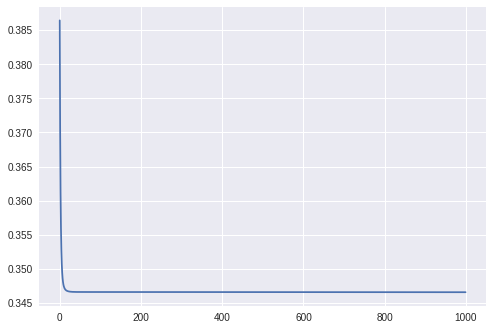

In [36]:
plt.plot(_Loss)

In [37]:
accuracy(y_pred,y)

50.0